<h1 style = "border:3px solid blue; font:courier; color:teal; text-align:CENTER;">PREDICTING GYM CROWDS</H1>

<h4 style = "border:1px solid blue; font:courier; color:teal; text-align:left;">Imports and Data Downloads</H4>

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [2]:
data =pd.read_csv("crowdness_gym_data.csv")

<h4 style = "border:1px solid blue; font:courier; color:teal; text-align:left;">EXPLORATORY DATA ANALYSIS</H4>

In [3]:
data.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [4]:
data.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [5]:
data.dtypes

number_people             int64
date                     object
timestamp                 int64
day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
dtype: object

In [6]:
data.isna().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

<h4 style = "border:1px solid blue; font:courier; color:teal; text-align:left;">CORRELATIONS</H4>

In [7]:
data.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


In [8]:
correlations = data.corr()

<AxesSubplot:>

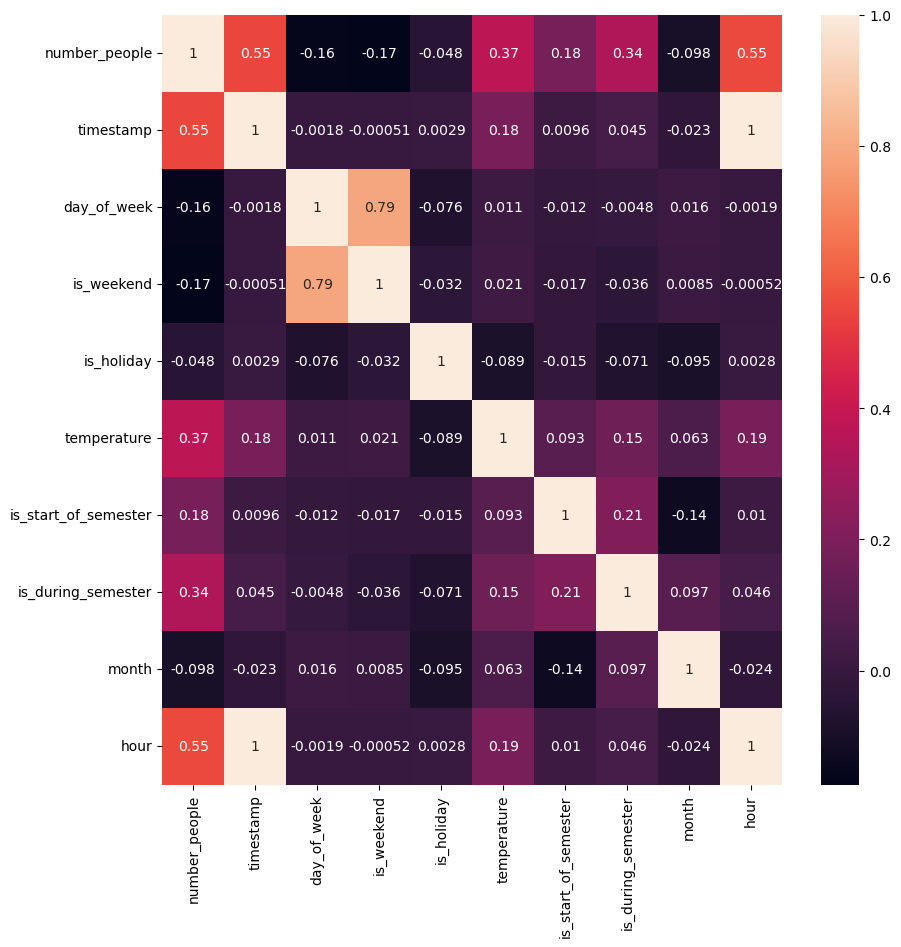

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlations, annot=True)

<h4 style = "border:1px solid blue; font:courier; color:teal; text-align:left;">DISTRIBUTIONS</H4>

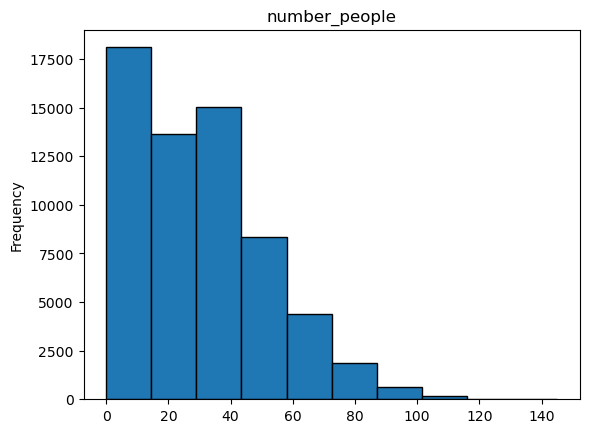

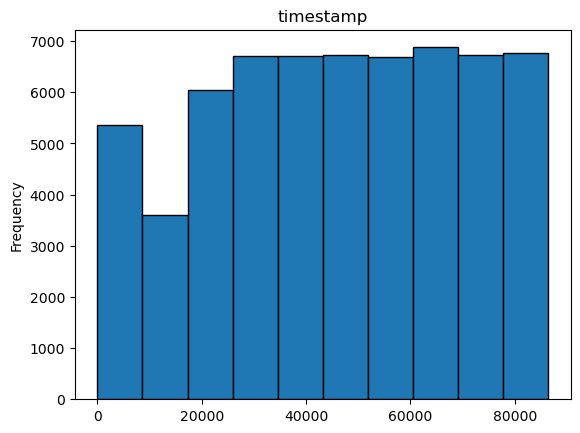

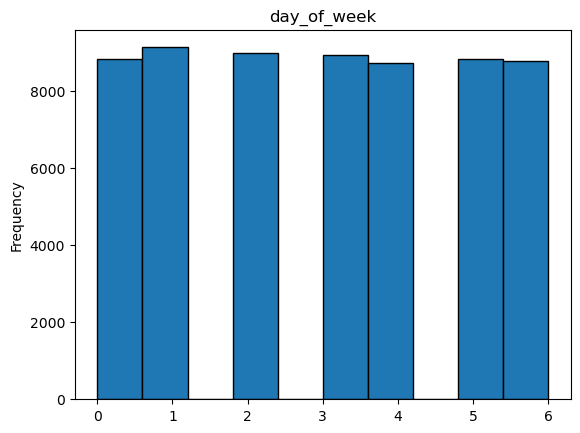

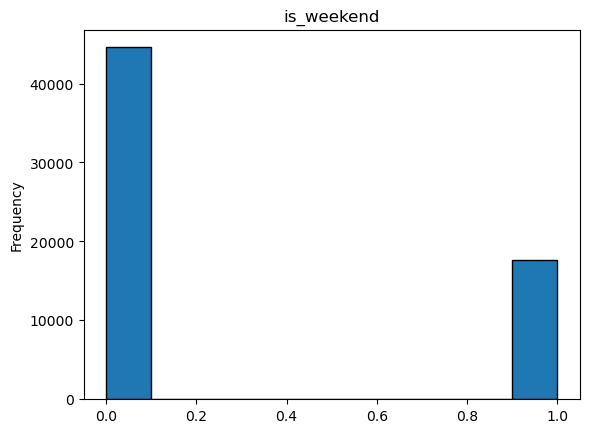

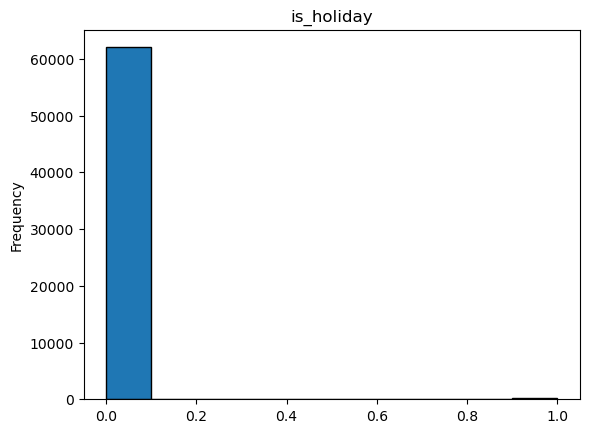

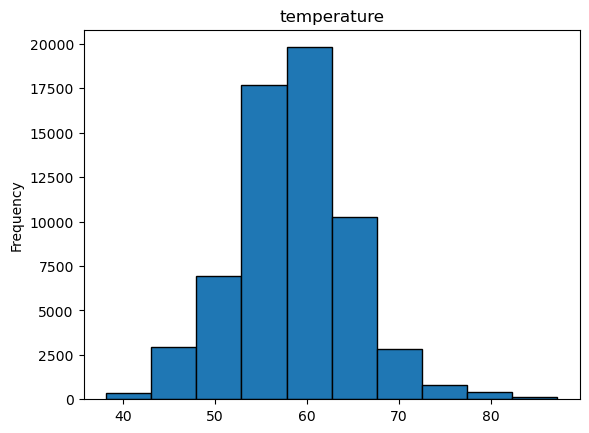

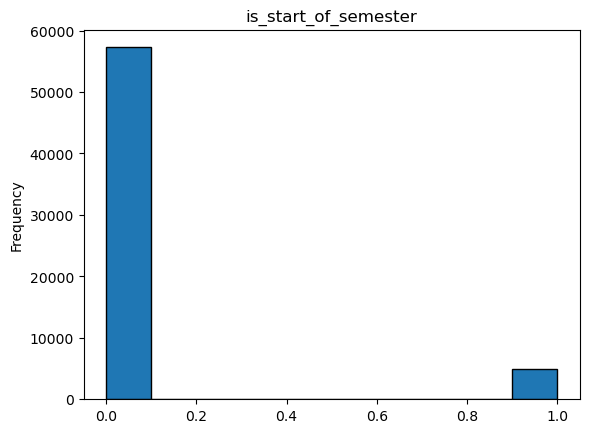

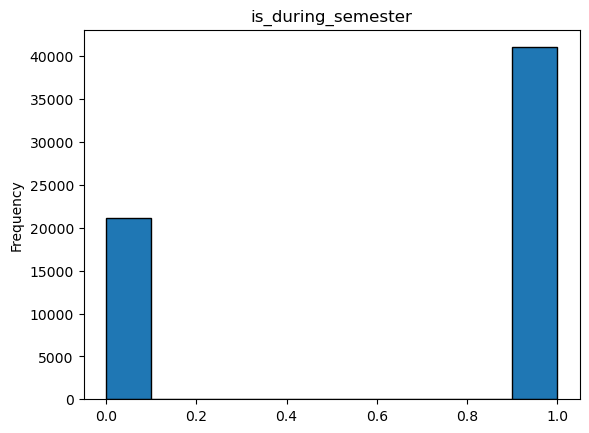

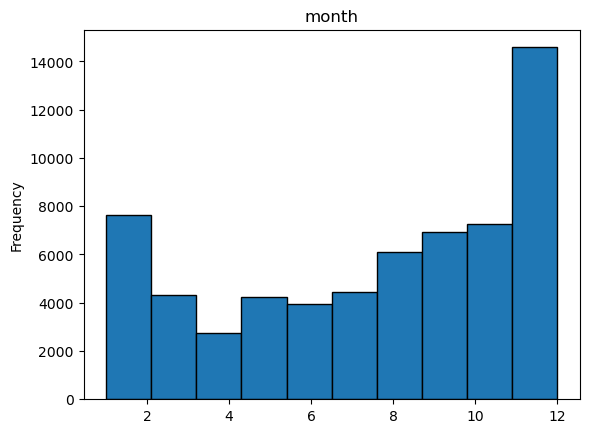

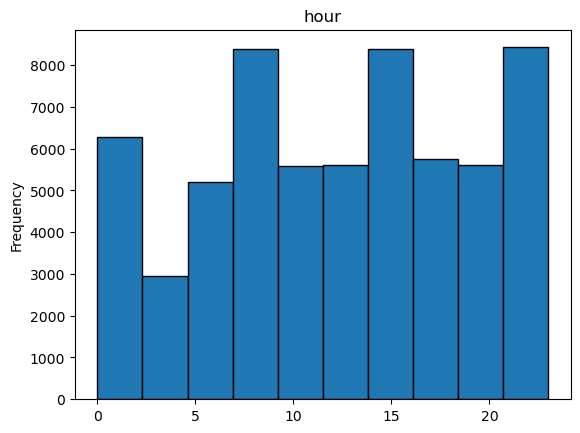

In [10]:
for col in data.columns:
    try:
        data[col].plot(kind='hist', edgecolor='black')
        plt.title(col)
        plt.show()
    except:
        pass

<h4 style = "border:1px solid blue; font:courier; color:teal; text-align:left;">CHOOSING COLUMNS</H4>

Looking at the frequency plots and correlation map, I'd like to comment on each of the features.<p>

number_people:  This is our target column<p>

date: I don't think this is a necessary column, we already have the month<p>

timestamp: This column is not needed -already have day of week, month, hour.  It has the same correlation as hour, duplicate data.<p>

dayofweek: This column has little correlation.  On the frequency map all the days have pretty similar levels of gym visits.  I don't think we should focus on this column.<p>

is_weekend: This is comparing 2 days of the week vs 5 days of the week.  The frequency plot shows just about that distribution.  This column doesn't have a high correlation.  We won't focus on this column either. <p>

is_holiday: Holidays are a tiny percentage of the days of the year so it makes sense that they're a tiny percentage of the gym visits. The correlation is almost null.  We'll drop this column too. <p>

temperature: This feature has nice amount of variance in frequencies and nice correlation level.  We'll keep this column.<p>

isstartof_semester, is_during_semester:  Unless we know how many weeks are in the semester and calculate percentages weeks at start of semester vs in semester vs  during break, those numbers don't really have much signifigance.  Of course during semester has twice as many gym visits; it's also probably twice as many days of the year. And of course start of semester is a small percentage vs not start of semester -- we're looking at only a few weeks, so we wouldn't expect it to be more.  If the data showed otherwise, that would be indicative.  We'll drop these columns as well.<p>

month, hour: These are probably the two most important features.

In [11]:
data2 = data.drop(columns = ['timestamp', 'date', 'day_of_week', 'is_weekend', 'is_holiday',	'is_start_of_semester',	'is_during_semester'], axis =1 )
data2.head()

,number_people,temperature,month,hour
0,37,71.76,8,17
1,45,71.76,8,17
2,40,71.76,8,17
3,44,71.76,8,17
4,45,71.76,8,17


<h4 style = "border:1px solid blue; font:courier; color:teal; text-align:left;">Building Model</h4>

In [12]:
X=data2.drop(['number_people'], axis=1)
y=data2.number_people
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=35)

In [13]:
sgd1 = SGDRegressor(penalty='elasticnet')

(chose this parameter - penalty, to prevent overfitting because I added this in after I saw it was very overfitted)

In [14]:
sgd1.fit(X_train, y_train)

SGDRegressor(penalty='elasticnet')

In [15]:
predict1 = sgd1.predict(X_test)


<h4 style = "border:1px solid blue; font:courier; color:teal; text-align:left;">Metrics</h4>

In [16]:
MSE = mean_squared_error(y_test, predict1)
print(MSE)

328.9672877415956


In [17]:
RMSE = mean_squared_error(y_test, predict1, squared = False)
print(RMSE)

18.137455382208266


In [18]:
MAE=mean_absolute_error(y_test, predict1)
print(MAE)

13.662992856032034


In [19]:
R2=r2_score(y_test, predict1)
R2

0.3631674866661869

I ran this model a number of times, each time with a different test size and different random parameters.  This was the best combination I found.  The dataquest mission did not say to add a parameter, which I only afterwards saw was on the graded rubic.  I went back and added elasticnet because it penalizes overfitting and I saw that the model seemed to be overfit.  After adding it, I reran those cells and saw that it only raised my r2 by 1%, not big difference.

<h4 style = "border:1px solid blue; font:courier; color:teal; text-align:left;">Visualization</h4>

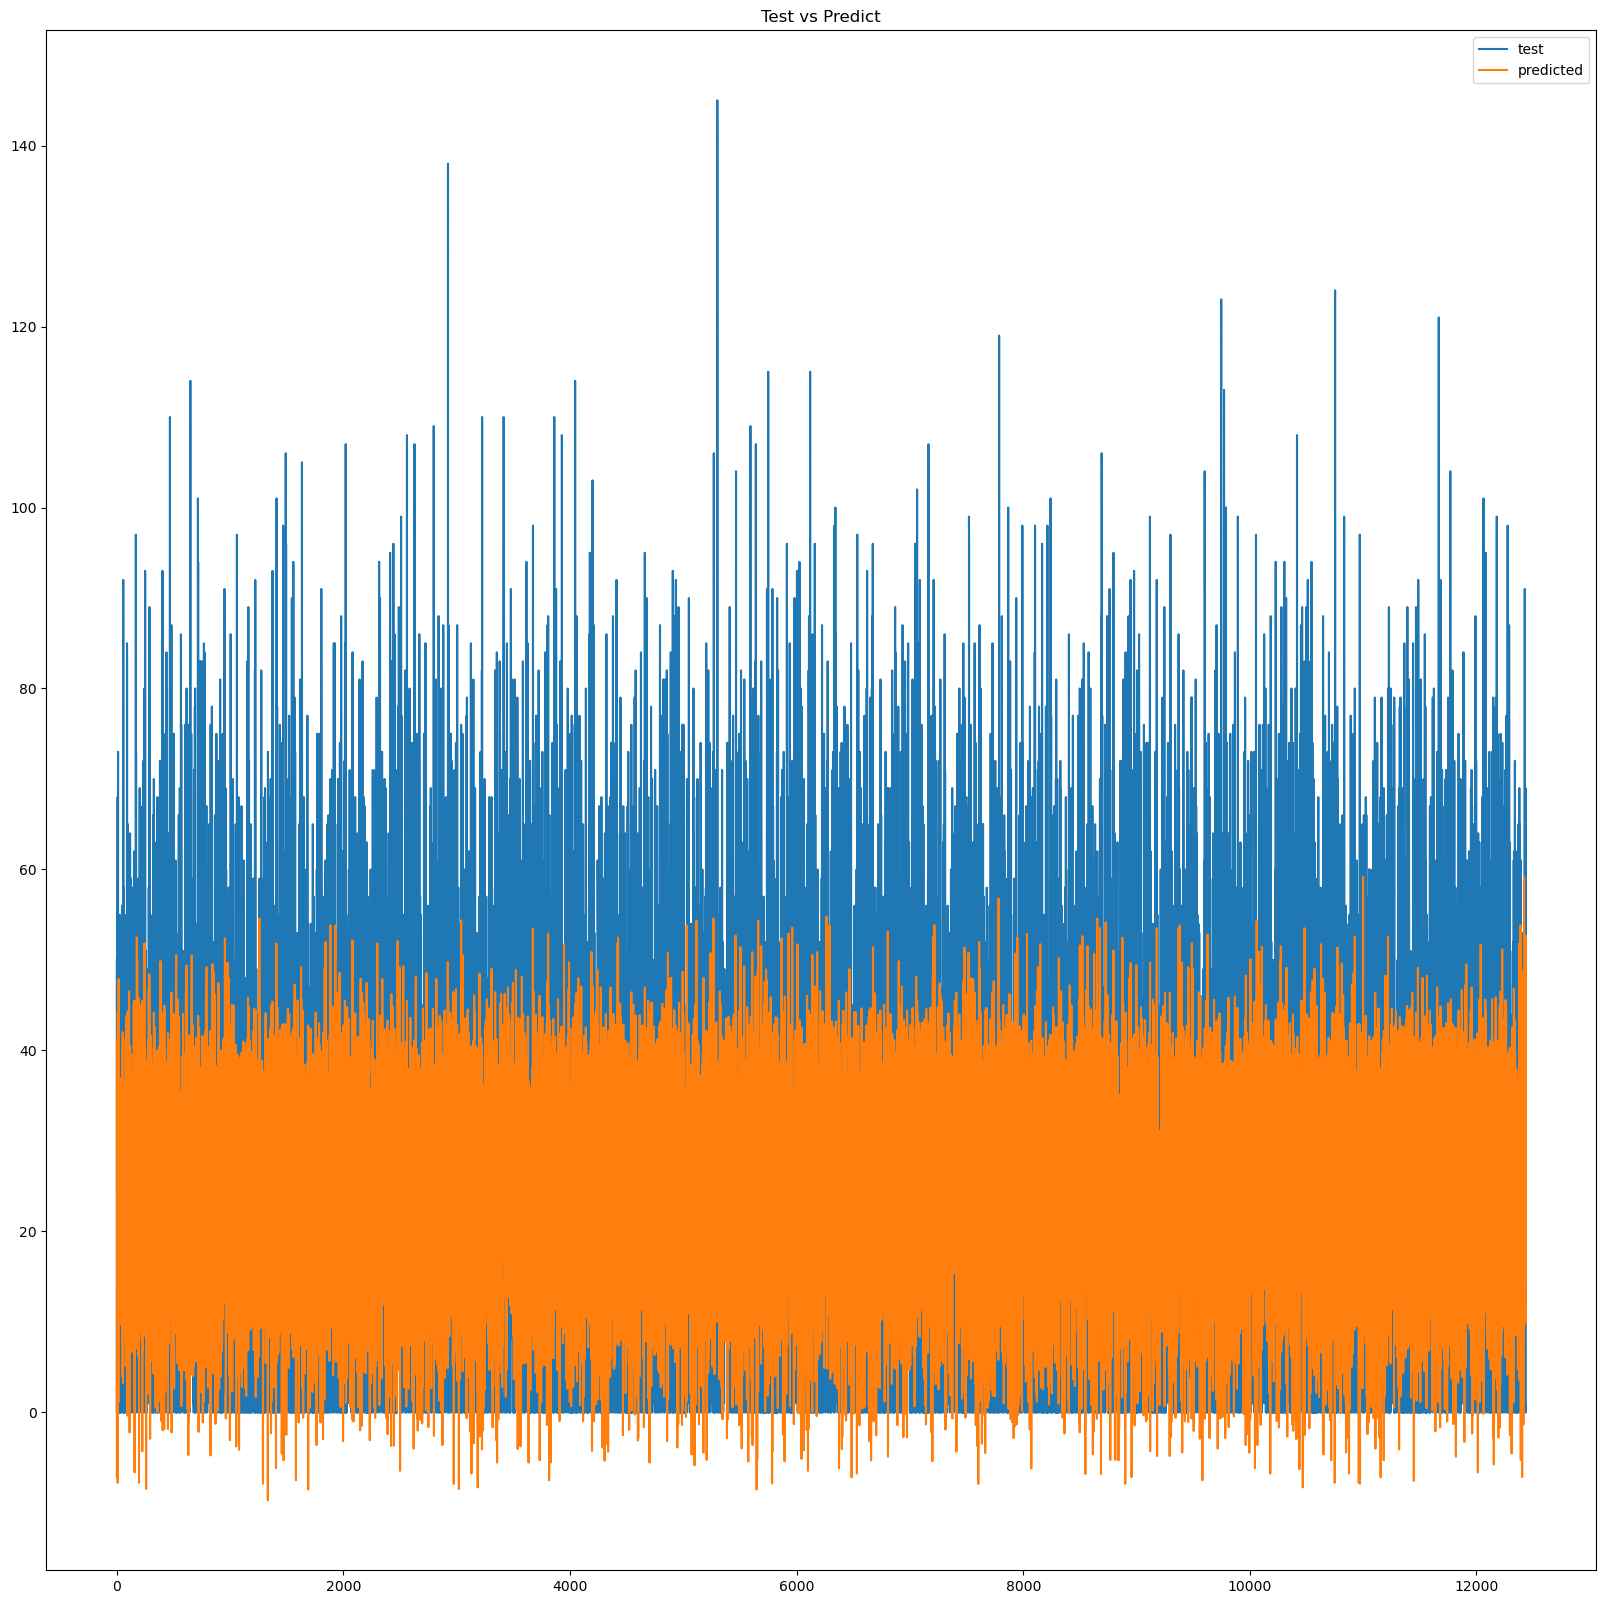

In [20]:
plt.figure(figsize=(20, 20))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="test")
plt.plot(x_ax, predict1, label="predicted")
plt.title("Test vs Predict")
plt.legend()
plt.show() 

The model is very underpredicting, I'll scale the data

<h4 style = "border:1px solid blue; font:courier; color:teal; text-align:left;">scaling data and rerunning the model</h4>

In [21]:
data3=data2.copy()

In [22]:
X2=data3.drop(['number_people'], axis=1)
y2=data3.number_people
X_train2, X_test2, y_train2, y_test2=train_test_split(X2,y2,test_size=0.2, random_state=35)

In [23]:
reg = make_pipeline(StandardScaler(),SGDRegressor())

In [24]:
reg.fit(X_train2, y_train2) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

<h4 style = "border:1px solid blue; font:courier; color:teal; text-align:left;">New Metrics</h4>

In [25]:
score  = reg.score(X_train2, y_train2)
print("R-squared2:", score)
y_pred_train  = reg.predict(X_train2)
mse2  = mean_squared_error(y_train2, y_pred_train)
mae2 = mean_absolute_error(y_train2, y_pred_train)
print("MSE2: ", mse2)
print("RMSE2: ", mse2**(1/2.0))
print("MAE2: ", mae2)

R-squared2: 0.38893911473720666
MSE2:  314.267777995536
RMSE2:  17.72759932973261
MAE2:  13.775092581420196


scaling data did not make a difference in scores (very negligible difference)

<h4 style = "border:1px solid blue; font:courier; color:teal; text-align:left;">Summary</h4>

This model clearly still needs a lot of work.  Perhaps this is not even the best model to use for this dataset.  I would have to explore using different features, different parameters, etc.  If I had to choose, based on this data when to go to the gym, the best time to go would be at 5am, though I'd probably choose to stay in bed and go at a more crowded time!  I don't see using months and semesters and holidays as options in choosing: if you want to go to the gym, you want to know when today or at most when this week to go, not when this year to go.  I don't really have a proper conclusion as this model needs a lot more work to properly predict.